<a href="https://colab.research.google.com/github/SoumyojitMondal/AI_ML_Colab_Repo/blob/main/LinearRegression_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(100,) (100,)


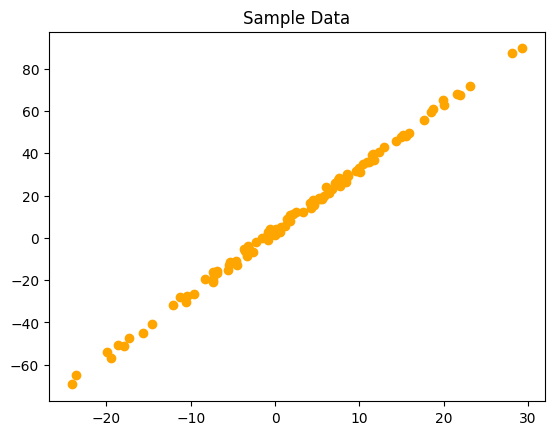

In [3]:
# Data generate X, Y
def generateDataset(m):
  X = np.random.randn(m)*10
  noise = np.random.rand(m)
  y = 3*X +1 + 5*noise
  return X, y
X,y = generateDataset(100)
print(X.shape, y.shape)

def plotData(X, y, color="orange", title="Sample Data"):
  plt.title(title)
  plt.scatter(X,y,c=color)
  plt.show()
plotData(X,y)

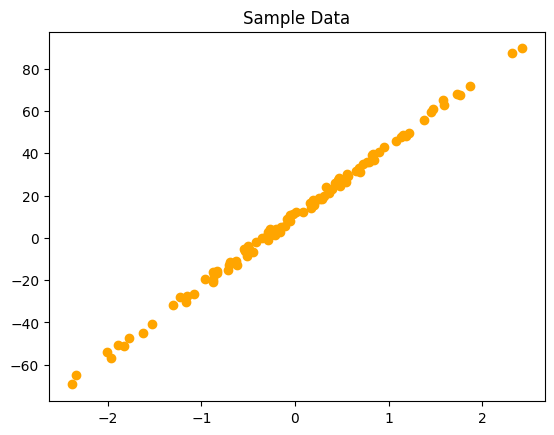

In [4]:
#Normalize data
def normalizeData(X):
  X = (X-X.mean())/X.std()
  return X
X = normalizeData(X)
plotData(X,y)

In [5]:
def trainTestSplit(X,y, split=0.8):
  m = X.shape[0]
  data = np.zeros((m,2))
  data[:,0] = X
  data[:,1] = y
  np.random.shuffle(data)
  split = int(m*split)
  XTrain = data[:split,0]
  yTrain = data[:split,1]
  XTest = data[split:,0]
  yTest = data[split:,1]
  return XTrain, yTrain, XTest, yTest

XTrain, yTrain, XTest, yTest = trainTestSplit(X,y)
print(XTrain.shape, yTrain.shape)
print(XTest.shape, yTest.shape)



(80,) (80,)
(20,) (20,)


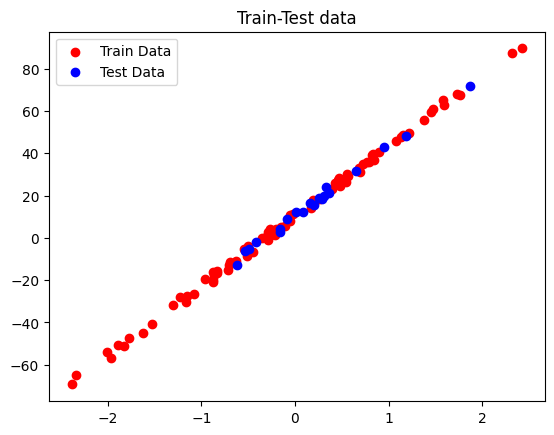

In [6]:
plt.scatter(XTrain, yTrain, color='red', label="Train Data")
plt.scatter(XTest, yTest, color='blue', label="Test Data")
plt.title("Train-Test data")
plt.legend()
plt.show()

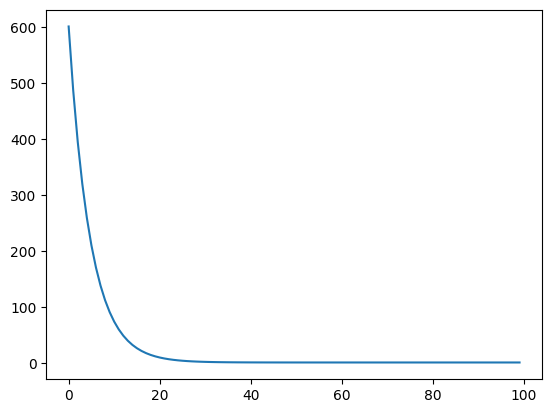

In [7]:
#Hypothesis function
def hypothesis(X, theta):
  return theta[0] + theta[1]*X

#Error function
def error(X,y,theta):
  m = X.shape[0]
  e= 0
  for i in range(m):
    y_i = hypothesis(X[i], theta)
    e = e + (y[i] - y_i)**2
  return e/(2*m)

#Gradient function
def gradient(X,y,theta):
  m = X.shape[0]
  grad = np.zeros((2,))
  for i in range(m):
    exp = hypothesis(X[i], theta) - y[i]
    grad[0] += (exp)
    grad[1] += (exp)*X[i]
  return grad/m

#Train Function
def train(X,y,learning_rate = 0.1):
  theta = np.zeros((2,))
  maxItrs = 100
  error_list = []
  for i in range(maxItrs):
    grad = gradient(X,y,theta)
    error_list.append(error(X,y,theta))
    theta[0] = theta[0] - learning_rate*grad[0]
    theta[1] = theta[1] - learning_rate*grad[1]
  plt.plot(error_list)
  return theta
theta = train(X,y)

In [10]:
theta

array([ 3.17704745, 26.85153573])

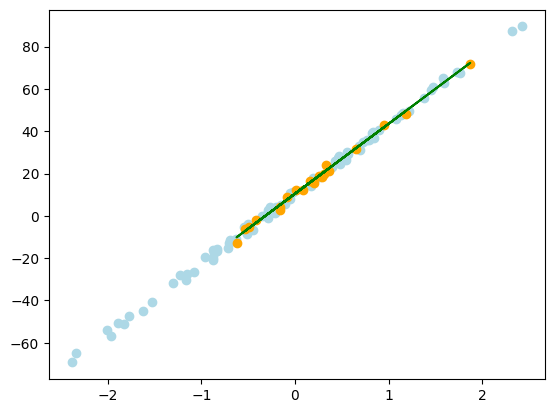

In [8]:
def predict(X,theta):
  return hypothesis(X,theta)

yPredict = predict(XTest, theta)

plt.scatter(XTrain,yTrain,color='lightblue',label='Train')
plt.scatter(XTest,yTest,color='orange', label='Test')
plt.plot(XTest, yPredict, color='green', label='Prediction')
plt.show()

In [9]:
#Model Evaluation
def r2Score(y,yPredict):
  ymean = y.mean()
  num = np.sum((y-yPredict)**2)
  denom = np.sum((y-ymean)**2)
  return 1 - num/denom

r2Score(yTest,yPredict)

0.9948866104584647